# Recession Accuracy 

Using the Yield Curve dataset develop a supervised learning model to accurately assess the periods when a recession occured. The recession column 0 indidcates no recession, whereas a 1 indicates a recession occurred. Split the data 80/20 train / test. Produce a validation accuracy.  

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import seaborn as sn
import matplotlib.pyplot as plt


## Load Data 

In [ ]:
y_df = pd.read_csv('yieldcurves_v2.csv', parse_dates=['Date'])
sp_df = pd.read_csv("SPX_500_Daily_Data_1927_2021.csv", parse_dates=["Date"])

In [ ]:
y_df.set_index("Date", inplace = True)
sp_df.set_index("Date", inplace = True)

In [ ]:
y_df.shape

(8008, 10)

In [ ]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0


In [ ]:
y_df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2021-12-27,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.88,0
2021-12-28,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.90,0
2021-12-29,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,1.96,0
2021-12-30,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.93,0
2021-12-31,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.90,0


Index(['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '30 Yr', 'Recession ', 'diff'],
      dtype='object')

In [ ]:
y_df.describe()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
count,8004.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,8007.000000,7013.000000,8008.000000
mean,2.617776,2.742755,2.864224,3.155971,3.369076,3.759111,4.064312,4.300784,4.825775,0.103521
std,2.300515,2.338706,2.342819,2.372302,2.328102,2.223877,2.138821,2.037001,1.975046,0.304658
min,0.000000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.990000,0.000000
25%,0.160000,0.260000,0.430000,0.810000,1.150000,1.710000,2.140000,2.495000,3.040000,0.000000
50%,2.100000,2.180000,2.390000,2.740000,2.970000,3.510000,3.890000,4.220000,4.660000,0.000000
75%,4.930000,5.070000,5.050000,5.240000,5.420000,5.650000,5.850000,5.900000,6.390000,0.000000
max,8.260000,8.490000,8.640000,9.050000,9.110000,9.100000,9.120000,9.090000,9.180000,1.000000


In [ ]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8008 entries, 1990-01-02 to 2021-12-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   3 Mo        8004 non-null   float64
 1   6 Mo        8007 non-null   float64
 2   1 Yr        8007 non-null   float64
 3   2 Yr        8007 non-null   float64
 4   3 Yr        8007 non-null   float64
 5   5 Yr        8007 non-null   float64
 6   7 Yr        8007 non-null   float64
 7   10 Yr       8007 non-null   float64
 8   30 Yr       7013 non-null   float64
 9   Recession   8008 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 688.2 KB


In [ ]:
sp_df.head()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0,0.0000,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0,0.5631,0.0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0,-0.2257,0.0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0,-0.9687,0.0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0,-0.2857,0.0


In [ ]:
sp_df.tail()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
2021-09-13,4474.81,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,4447.49,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
2021-09-17,4469.74,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


In [ ]:
y_df[y_df['3 Mo'].isna()]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2008-12-10,NaN,0.21,0.49,0.86,1.21,1.62,2.05,2.69,3.09,1
2008-12-18,NaN,0.15,0.43,0.68,0.92,1.26,1.59,2.08,2.53,1
2008-12-24,NaN,0.23,0.40,0.90,1.14,1.54,1.83,2.20,2.63,1
2010-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
y_df[y_df['6 Mo'].isna()]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2010-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
y_df.isnull().sum()

3 Mo            4
6 Mo            1
1 Yr            1
2 Yr            1
3 Yr            1
5 Yr            1
7 Yr            1
10 Yr           1
30 Yr         995
Recession       0
dtype: int64

In [ ]:
import datetime

def fill_nan_with_weekly_average(df):
  # Compute weekly averages

  monday = pd.Timestamp("1990-01-08")
  lastday = pd.Timestamp("2021-12-31")

  prev_avg = {}
  avg = {}
  while monday <= lastday:
    week = pd.date_range(monday, periods = 5, freq = "D")
    sub_df = df[week[0]:week[4]]

    for col in sub_df:
      avg[col] = sub_df[col].mean(skipna=True)
      if pd.isna(avg[col]):
        avg[col] = prev_avg[col]
      else:
        prev_avg[col] = avg[col]
      if sub_df[col].isnull().sum() != 0:
        for idx in week:
          try:
            if pd.isna(df[col].loc[idx]):
              df[col].loc[idx] = avg[col]
          except KeyError as e:
            # Must be a holiday
            pass
        
    monday = week[4] + datetime.timedelta(3
                                          )

fill_nan_with_weekly_average(y_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
y_df.isnull().sum()

3 Mo          0
6 Mo          0
1 Yr          0
2 Yr          0
3 Yr          0
5 Yr          0
7 Yr          0
10 Yr         0
30 Yr         0
Recession     0
dtype: int64

In [ ]:
y_df["diff"] = y_df["10 Yr"] - y_df["2 Yr"]

In [ ]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff
Date,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12


In [ ]:
df = pd.merge(y_df, sp_df, on = ["Date"])

In [ ]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,353.40,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,359.69,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,352.20,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [ ]:
# Same as Close or Adj Close
del df["Open"]

In [ ]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [ ]:
df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
2021-09-13,0.06,0.06,0.07,0.21,0.44,0.81,1.11,1.33,1.91,0,1.12,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,0.04,0.05,0.07,0.21,0.43,0.79,1.07,1.28,1.85,0,1.07,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,0.04,0.05,0.07,0.21,0.43,0.81,1.10,1.31,1.87,0,1.10,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
2021-09-16,0.04,0.05,0.07,0.23,0.46,0.84,1.13,1.34,1.88,0,1.11,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
2021-09-17,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.91,0,1.14,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


In [ ]:
X.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [ ]:
df.columns

Index(['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '30 Yr', 'Recession ', 'diff', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', '% Gain/Loss (Close)', '% Price Variation'],
      dtype='object')

## Selecting Features 

In [ ]:
X

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,0.06,0.06,0.07,0.21,0.44,0.81,1.11,1.33,1.91,1.12,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,0.04,0.05,0.07,0.21,0.43,0.79,1.07,1.28,1.85,1.07,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,0.04,0.05,0.07,0.21,0.43,0.81,1.10,1.31,1.87,1.10,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011


In [ ]:
y

Date
1990-01-02    0
1990-01-03    0
1990-01-04    0
1990-01-05    0
1990-01-08    0
             ..
2021-09-13    0
2021-09-14    0
2021-09-15    0
2021-09-16    0
2021-09-17    0
Name: Recession , Length: 7926, dtype: int64

In [ ]:
X, y = df.drop(columns=['Recession ']), df['Recession '] # Features ,  Target Variable 

# Split into Train and Test 

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = X["1990-01-02" : "2016-01-01"]
y_train = y["1990-01-02" : "2016-01-01"]


X_test = X["2016-01-02" : "2021-09-17"]
y_test = y["2016-01-02" : "2021-09-17"]

In [ ]:
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6497, 17)

(6497,)

(1429, 17)

(1429,)

## Train the Model

In [ ]:
# Instantiate the model (default parameters)
lr = LogisticRegression()

# Fit model with data
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X_train['2 Yr'] > X_train['10 Yr']

Date
1990-01-02    False
1990-01-03    False
1990-01-04    False
1990-01-05    False
1990-01-08    False
              ...  
2015-12-24    False
2015-12-28    False
2015-12-29    False
2015-12-30    False
2015-12-31    False
Length: 6497, dtype: bool

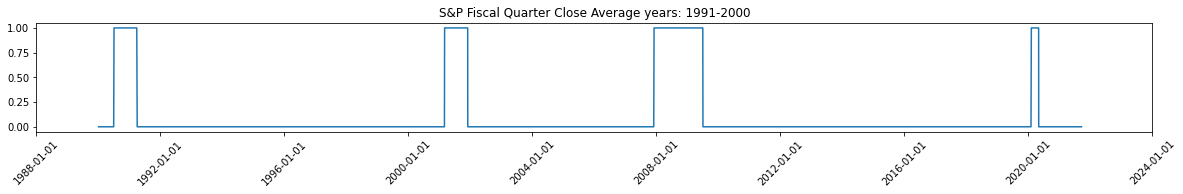

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(df.index, df["Recession "])
ax.set_title("S&P Fiscal Quarter Close Average years: 1991-2000")
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation = 45)
plt.show()

# Predict with Test Data

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation 

Develop a Confusion Matrix 

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print('Confusion matrix\n\n', cnf_matrix)
print('\nTrue Positives(TP) = ', cnf_matrix[0,0])
print('\nTrue Negatives(TN) = ', cnf_matrix[1,1])
print('\nFalse Positives(FP) = ', cnf_matrix[0,1])
print('\nFalse Negatives(FN) = ', cnf_matrix[1,0])

Confusion matrix

 [[1367    0]
 [  62    0]]

True Positives(TP) =  1367

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  62


# Accuracy Score 

In [ ]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ' ,accuracyScore)
print('Accuracy Score as  %  : ' ,int(accuracyScore*100), '%')

Accuracy Score :  0.9566130160951715
Accuracy Score as  %  :  95 %
